**Table of contents of this notebook:**

1. [Importing Necessary Libraries](#1)

2. [Loading The Data](#2)

3. [Missing Values And Outliers](#3)

4. [Exploratory Data Analysis](#4)

5. [Data Preprocessing](#5)

6. [Models](#6)

<h1  style="text-align: center" class="list-group-item list-group-item-action active">1. Importing Necessary Libraries</h1><a id = "1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore')
colors = sns.color_palette("pastel")[0:5]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


<h1  style="text-align: center" class="list-group-item list-group-item-action active">2.Loading The Data</h1><a id = "2"></a>

In [4]:
data = pd.read_csv("E:/3.hocki1nam4\IoT\BTL_IOT\BE\data\smoke_detection_iot.csv",index_col=0)
df = data.copy()

In [5]:
df.describe()

UTC  Temperature[C]   Humidity[%]     TVOC[ppb]     eCO2[ppm]  \
count  6.263000e+04    62630.000000  62630.000000  62630.000000  62630.000000   
mean   1.654792e+09       15.970424     48.539499   1942.057528    670.021044   
std    1.100025e+05       14.359576      8.865367   7811.589055   1905.885439   
min    1.654712e+09      -22.010000     10.740000      0.000000    400.000000   
25%    1.654743e+09       10.994250     47.530000    130.000000    400.000000   
50%    1.654762e+09       20.130000     50.150000    981.000000    400.000000   
75%    1.654778e+09       25.409500     53.240000   1189.000000    438.000000   
max    1.655130e+09       59.930000     75.200000  60000.000000  60000.000000   

             Raw H2   Raw Ethanol  Pressure[hPa]         PM1.0         PM2.5  \
count  62630.000000  62630.000000   62630.000000  62630.000000  62630.000000   
mean   12942.453936  19754.257912     938.627649    100.594309    184.467770   
std      272.464305    609.513156       1.331344    922.524245   1976.305615   
min    10668.000000  15317.000000     930.852000      0.000000      0.000000   
25%    12830.000000  19435.000000     938.700000      1.280000      1.340000   
50%    12924.000000  19501.000000     938.816000      1.810000      1.880000   
75%    13109.000000  20078.000000     939.418000      2.090000      2.180000   
max    13803.000000  21410.000000     939.861000  14333.690000  45432.260000   

              NC0.5         NC1.0         NC2.5           CNT    Fire Alarm  
count  62630.000000  62630.000000  62630.000000  62630.000000  62630.000000  
mean     491.463608    203.586487     80.049042  10511.386157      0.714626  
std     4265.661251   2214.738556   1083.383189   7597.870997      0.451596  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        8.820000      1.384000      0.033000   3625.250000      0.000000  
50%       12.450000      1.943000      0.044000   9336.000000      1.000000  
75%       14.420000      2.249000      0.051000  17164.750000      1.000000  
max    61482.030000  51914.680000  30026.438000  24993.000000      1.000000

<h1  style="text-align: center" class="list-group-item list-group-item-action active">3. Missing Values And Outliers</h1><a id = "3"></a>

In [6]:
df.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [7]:
dfCategorical = df.select_dtypes(exclude = np.number)
dfNumeric = df.select_dtypes(include=np.number)

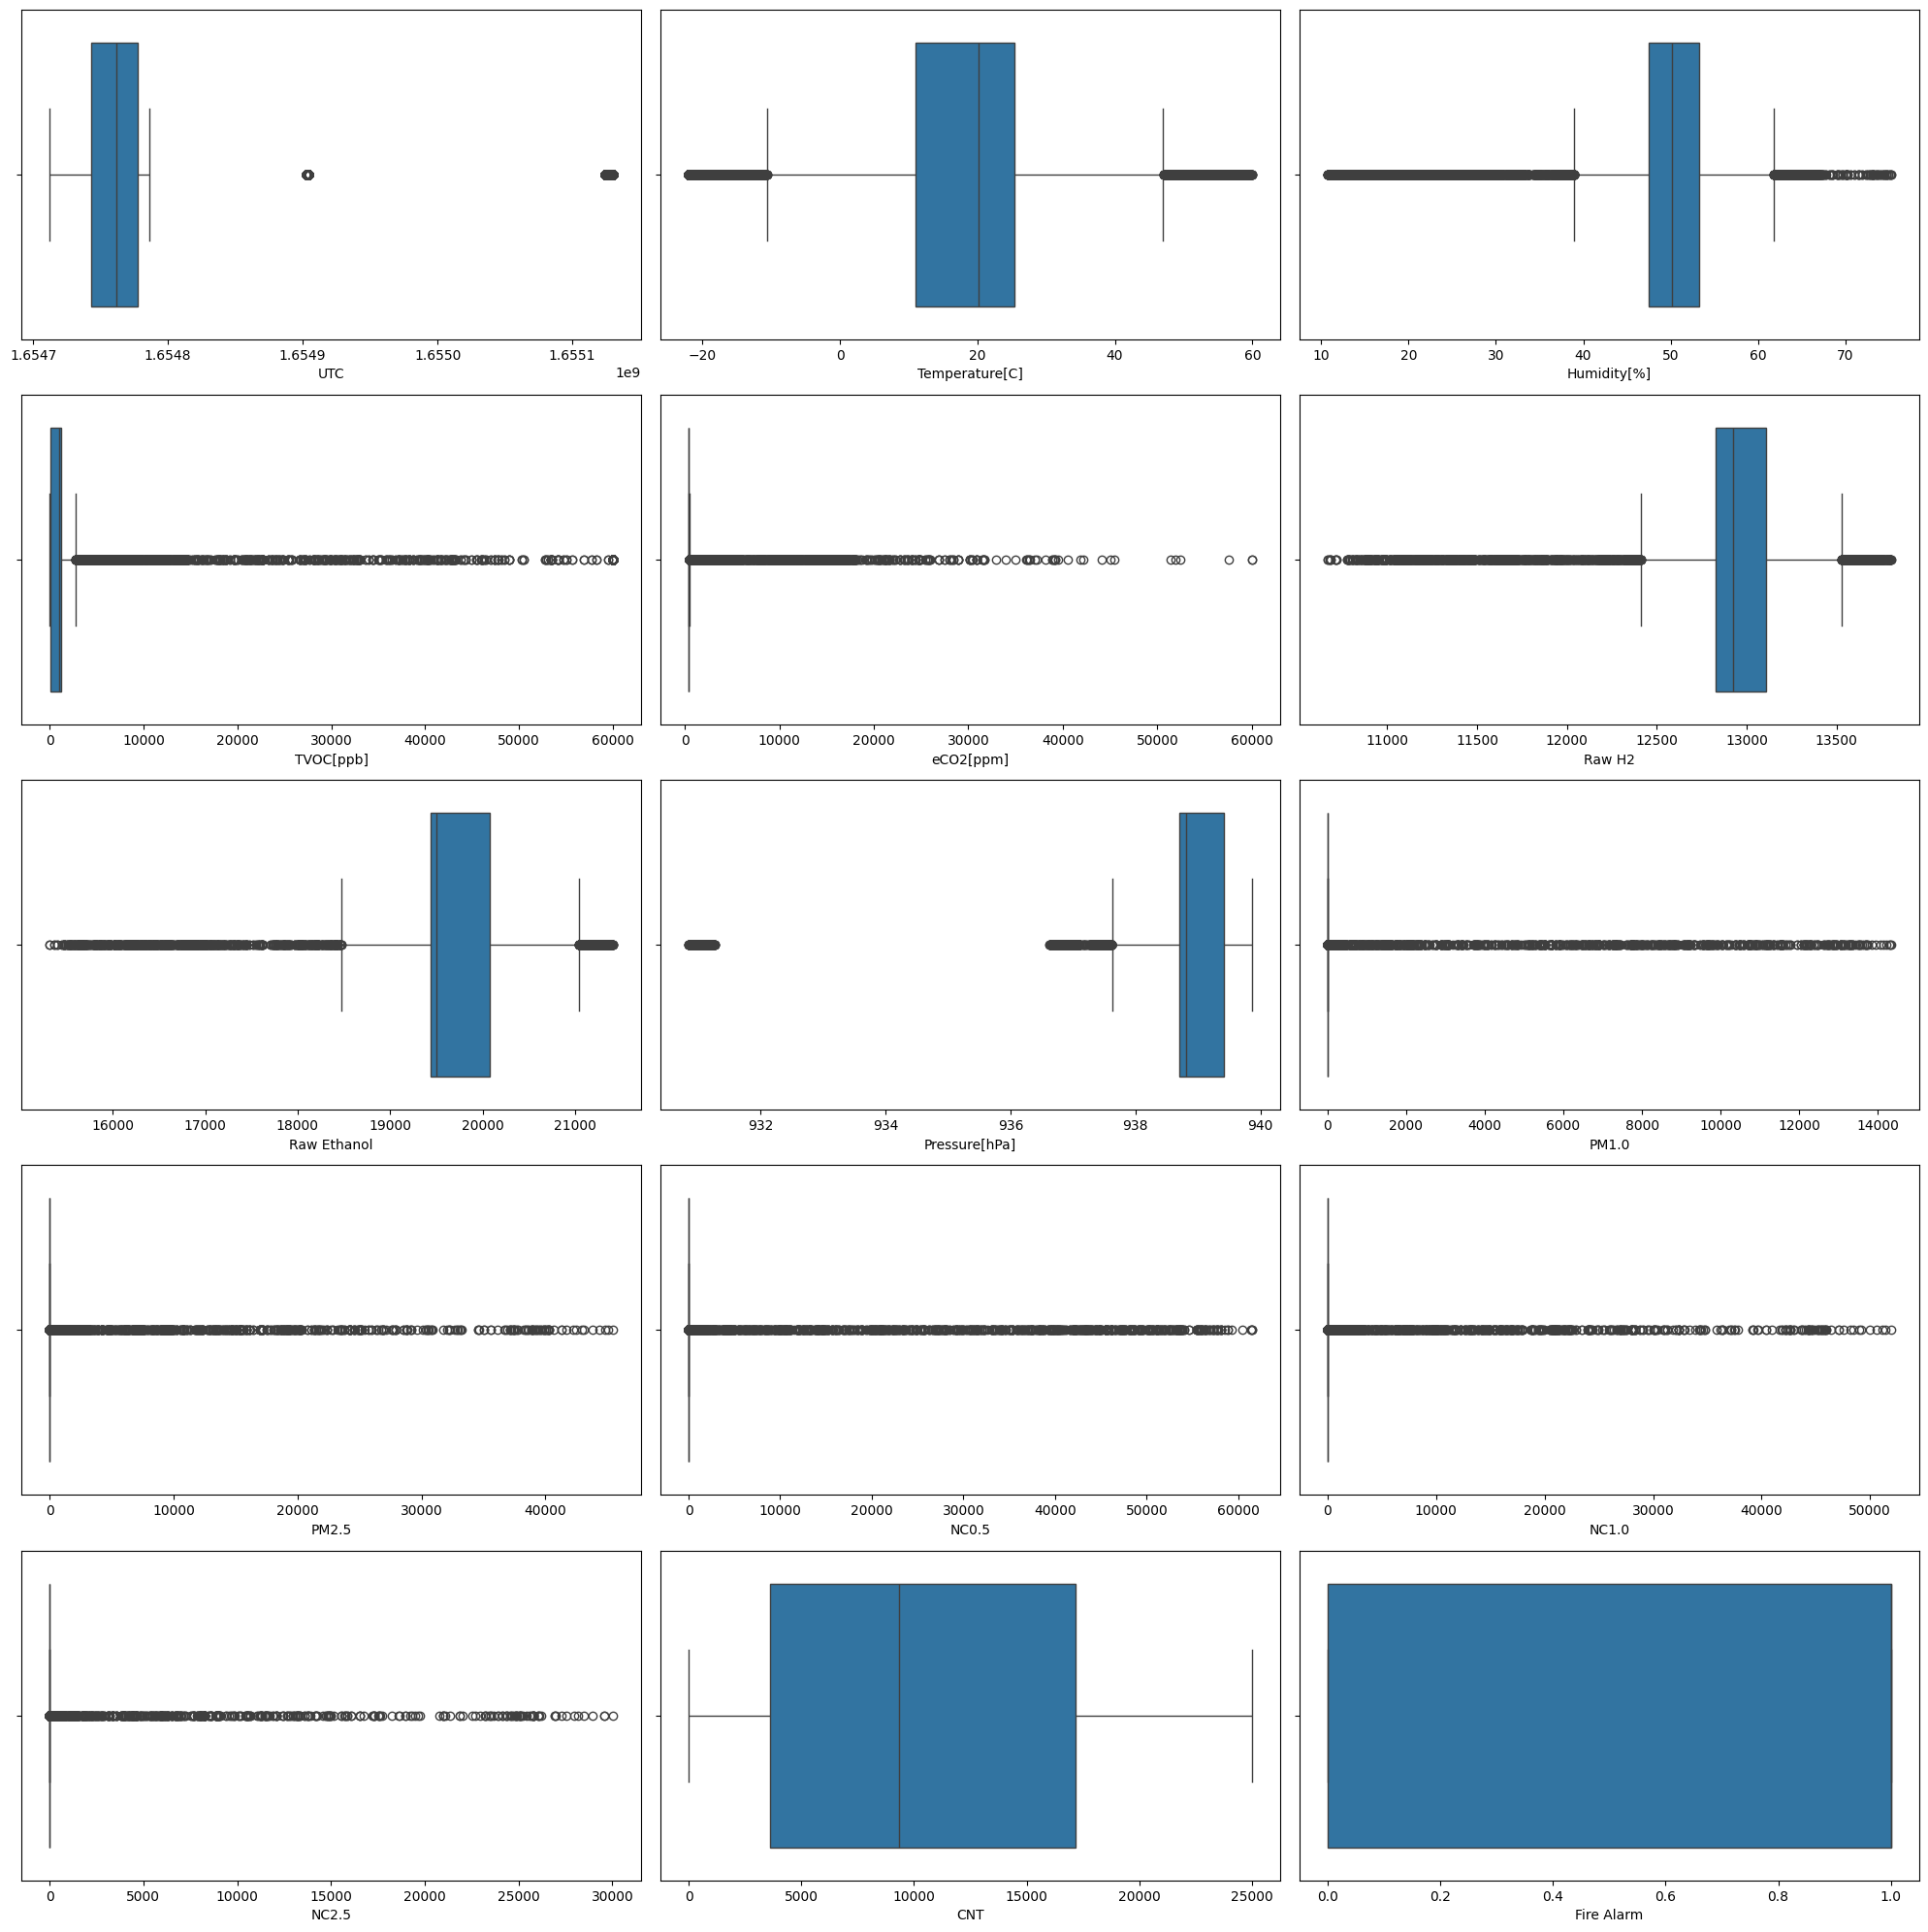

In [8]:
plt.figure(figsize=(20,20))

for index,column in enumerate(dfNumeric):
    plt.subplot(5,3,index+1)
    sns.boxplot(data=dfNumeric,x=column)
    
plt.tight_layout(pad = 1.0)

In [9]:
df.UTC.max()

1655130051

In [10]:
dfNumeric = dfNumeric[dfNumeric["UTC"] < 1655105000]
dfNumeric = dfNumeric[dfNumeric["Pressure[hPa]"] > 932]

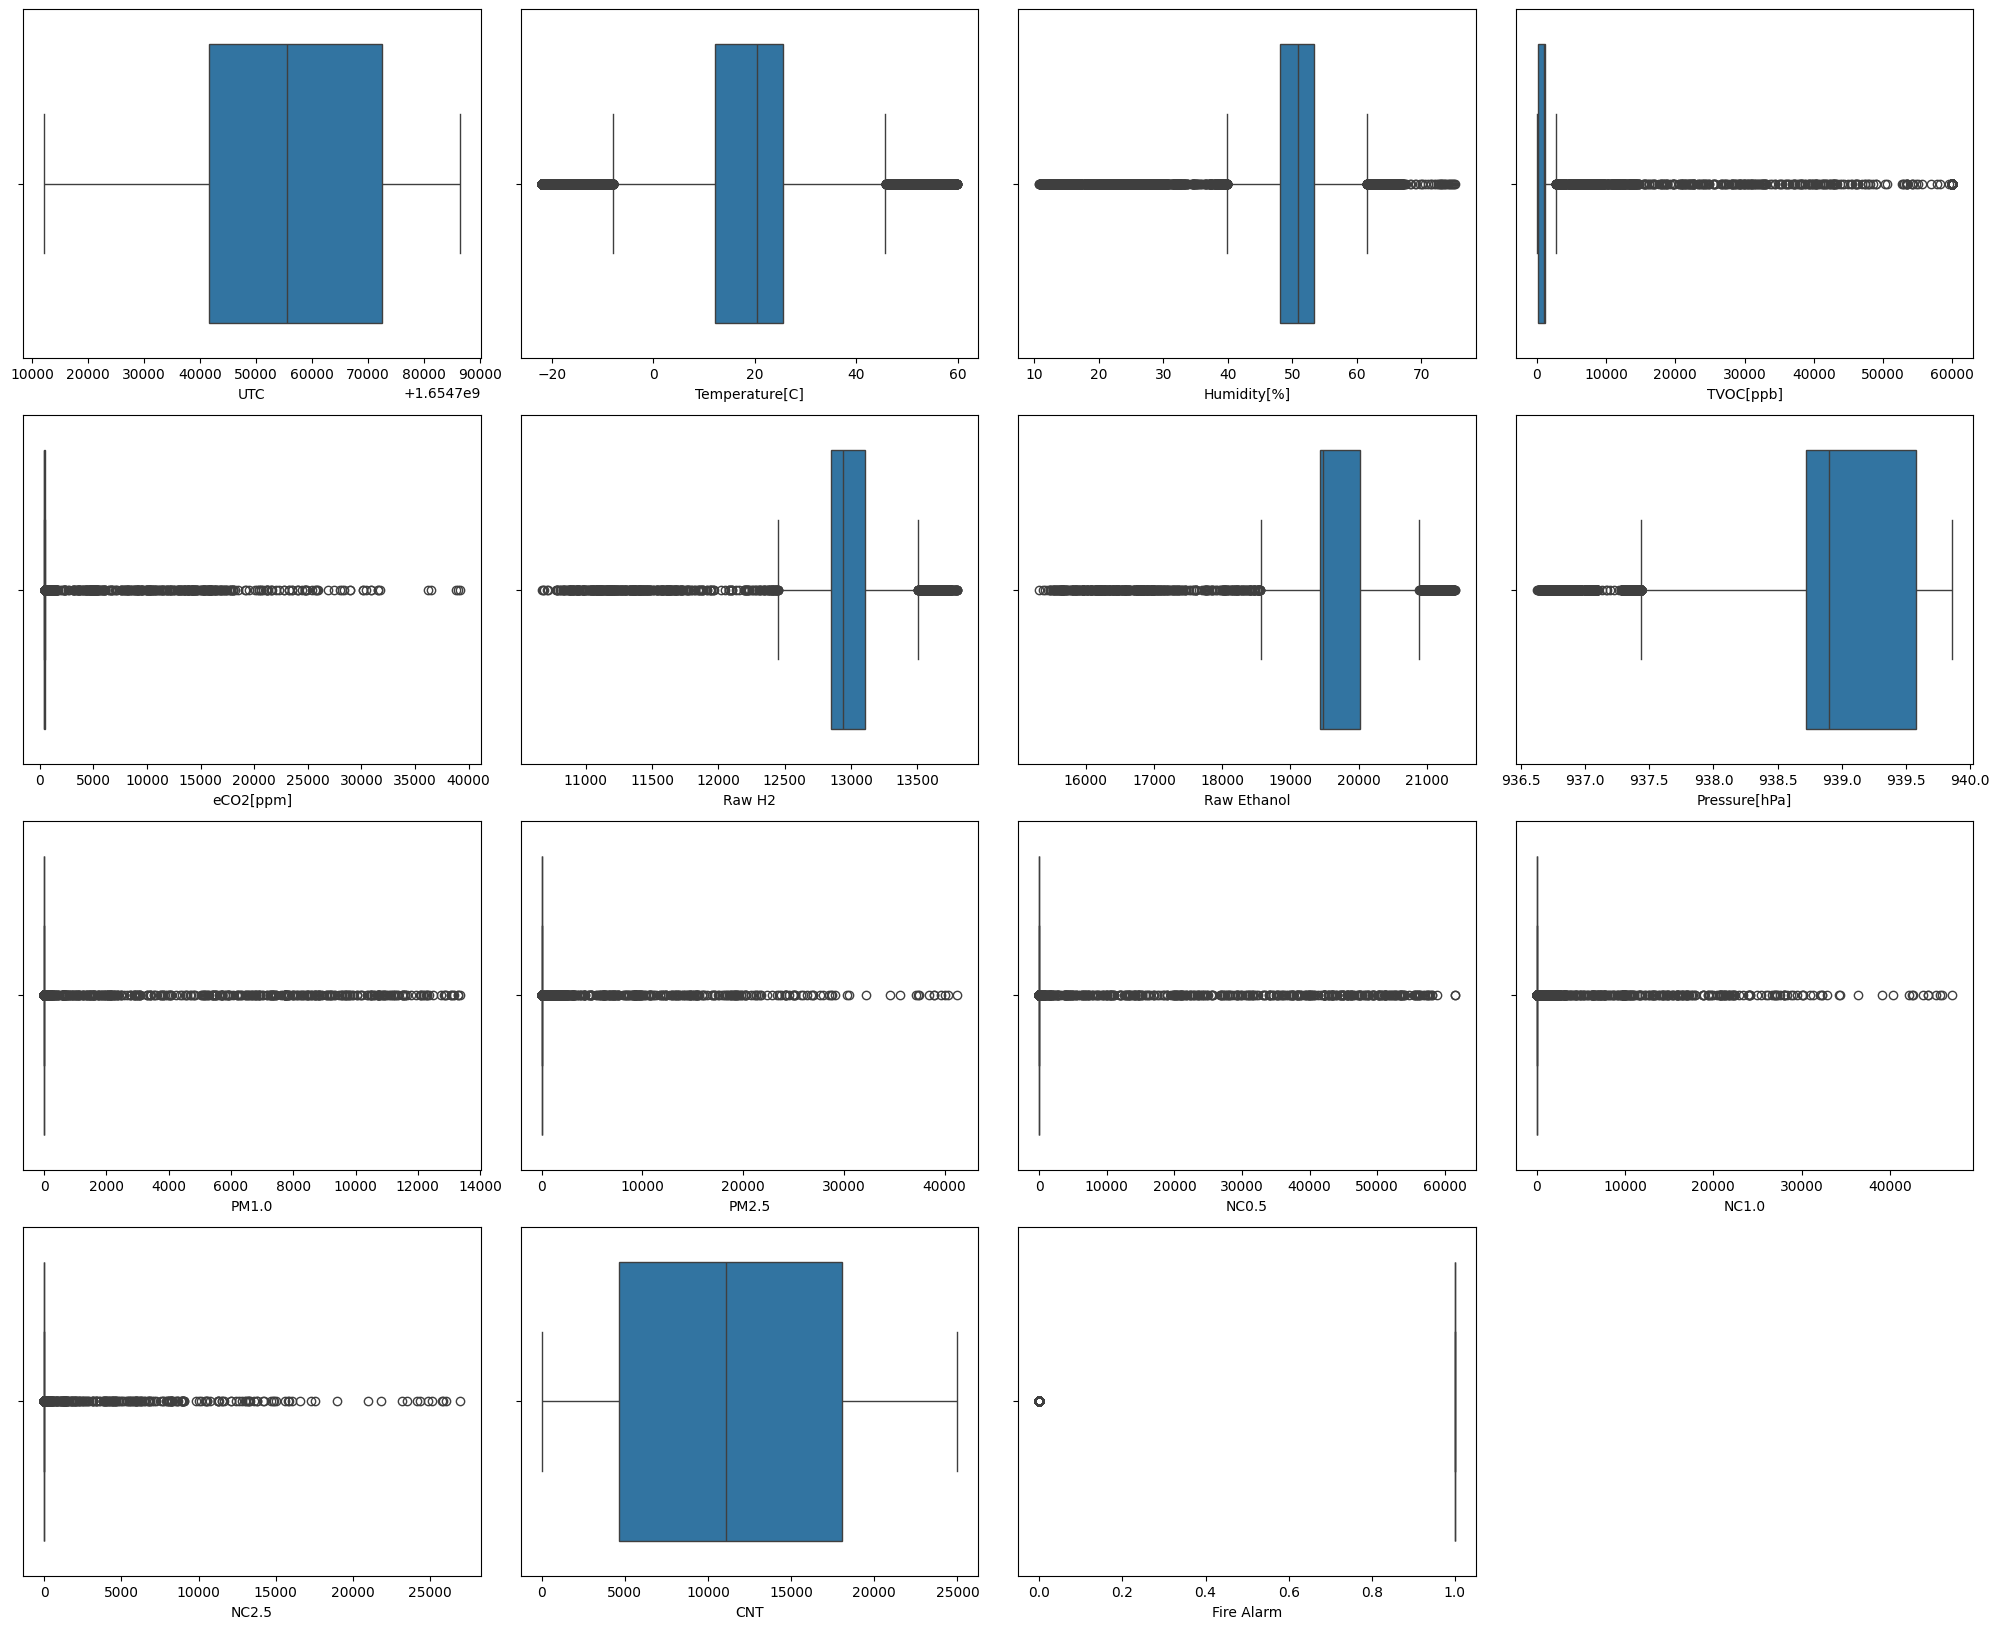

In [11]:
plt.figure(figsize=(20,20))

for index,column in enumerate(dfNumeric):
    plt.subplot(5,4,index+1)
    sns.boxplot(data=dfNumeric,x=column)
    
plt.tight_layout(pad = 1.0)

<h1  style="text-align: center" class="list-group-item list-group-item-action active">4. Exploratory Data Analysis</h1><a id = "4"></a>

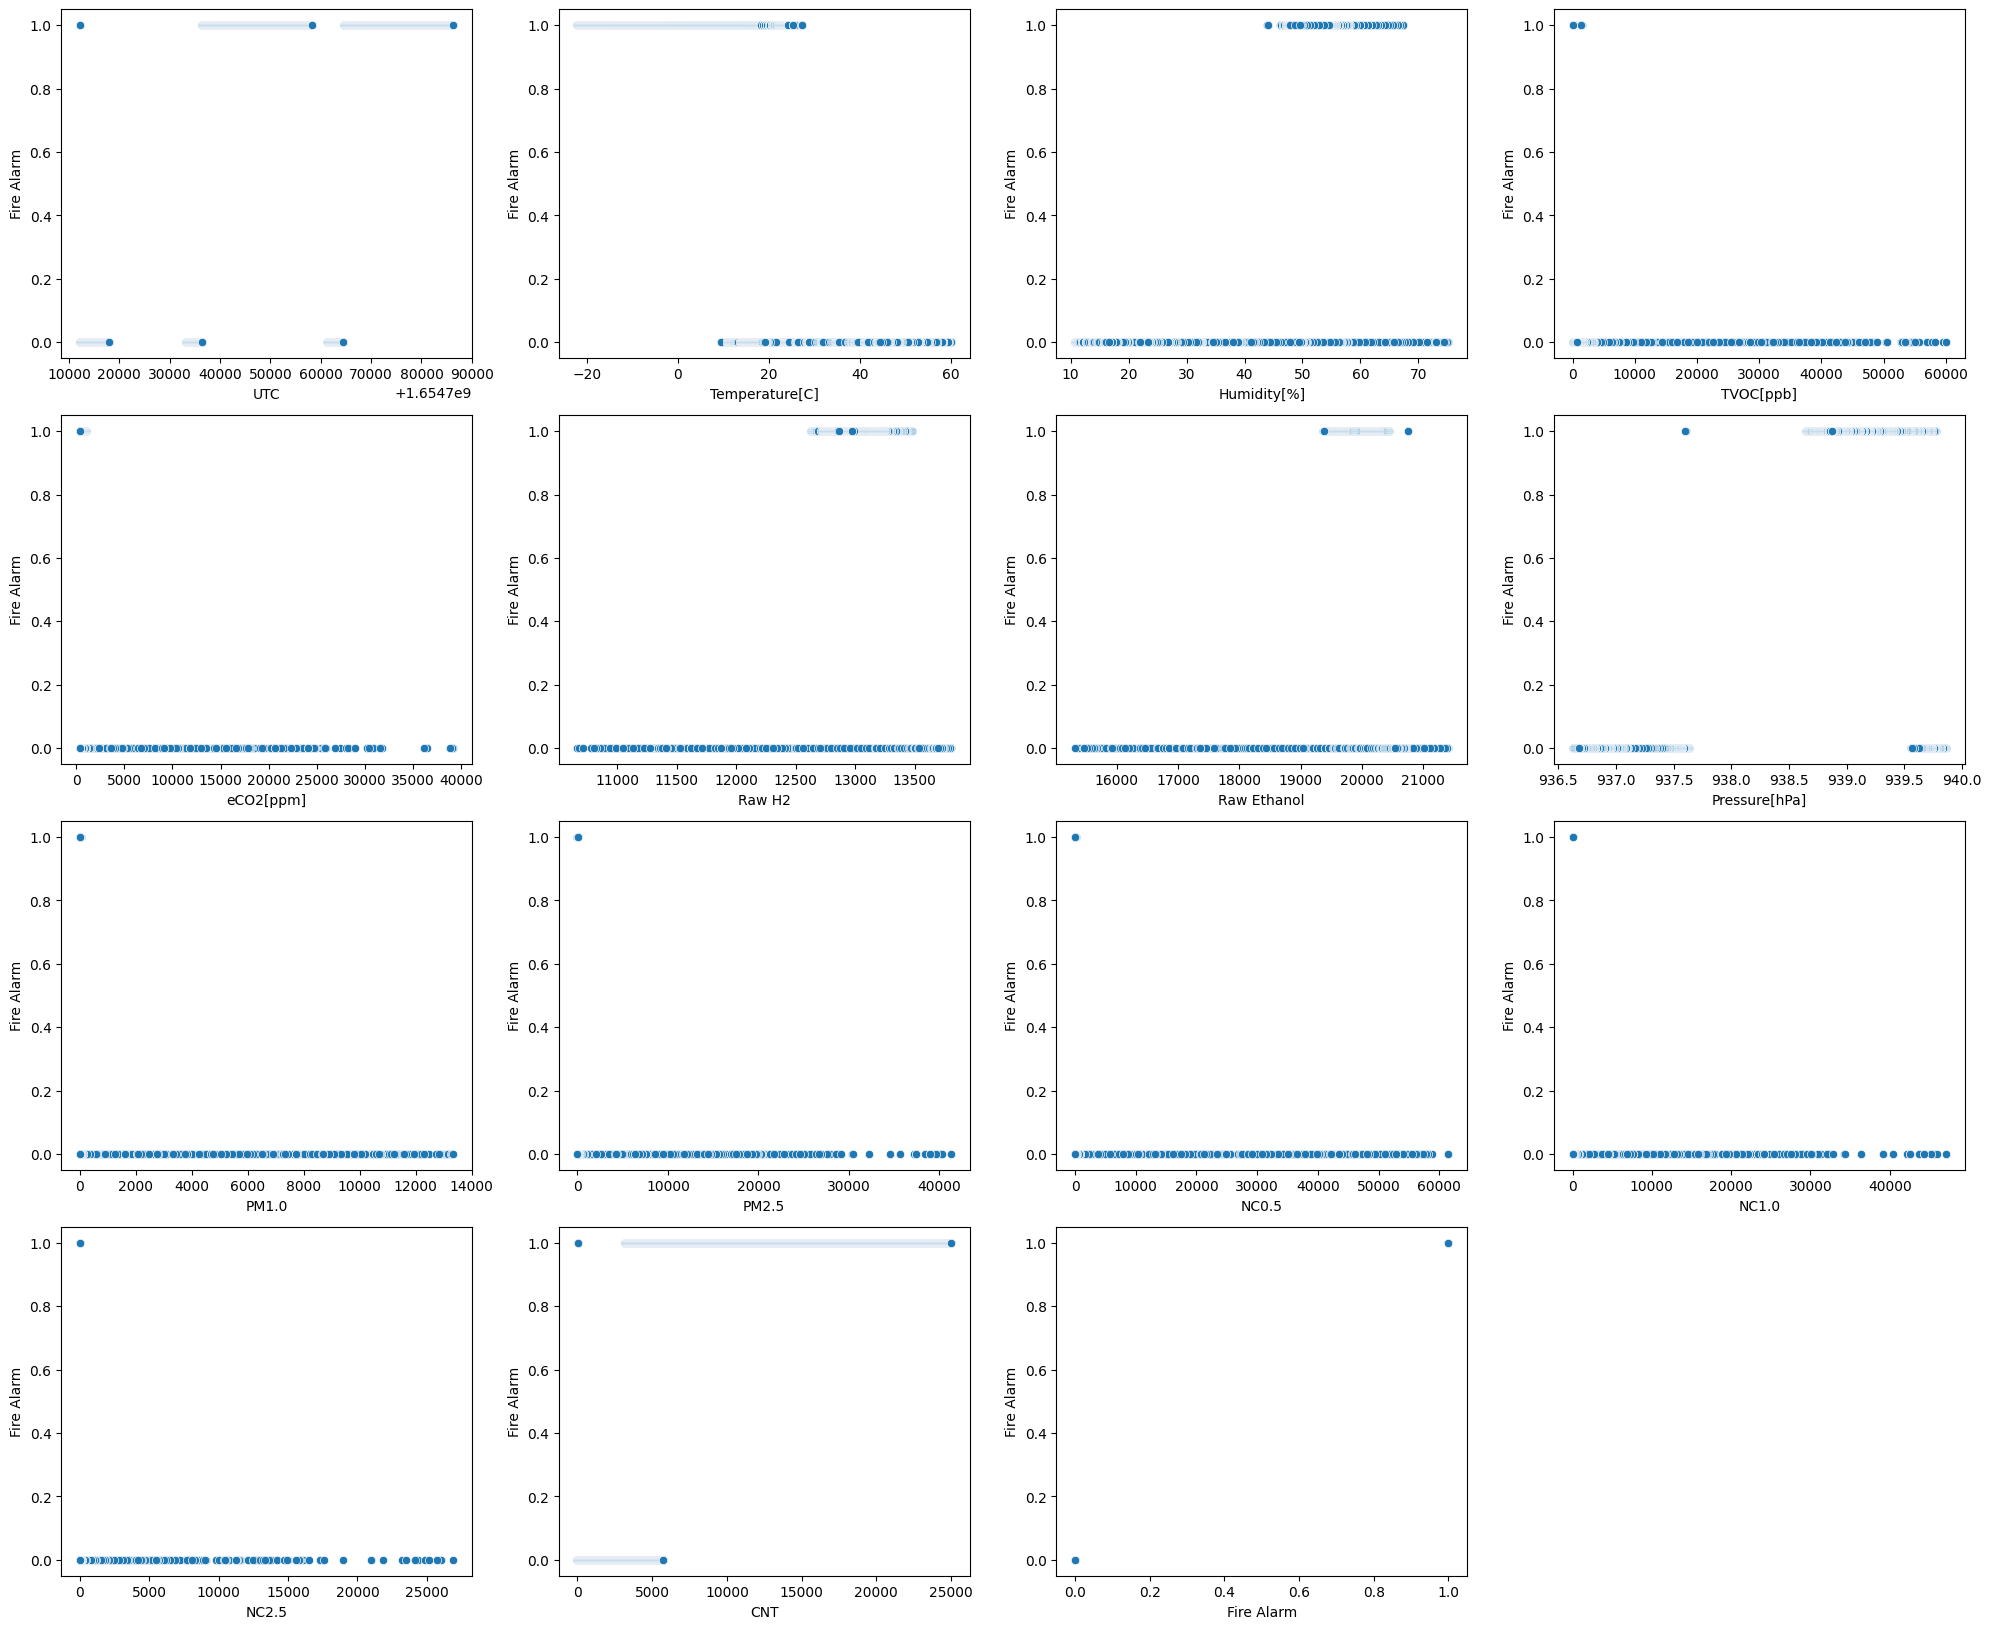

In [12]:
plt.figure(figsize=(20,20))

for index,column in enumerate(dfNumeric):
    plt.subplot(5,4,index+1)
    sns.scatterplot(data=dfNumeric,x=column,y=df["Fire Alarm"])
    
plt.tight_layout(pad = 1.0)

In [13]:
dfNumeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55732 entries, 0 to 56885
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             55732 non-null  int64  
 1   Temperature[C]  55732 non-null  float64
 2   Humidity[%]     55732 non-null  float64
 3   TVOC[ppb]       55732 non-null  int64  
 4   eCO2[ppm]       55732 non-null  int64  
 5   Raw H2          55732 non-null  int64  
 6   Raw Ethanol     55732 non-null  int64  
 7   Pressure[hPa]   55732 non-null  float64
 8   PM1.0           55732 non-null  float64
 9   PM2.5           55732 non-null  float64
 10  NC0.5           55732 non-null  float64
 11  NC1.0           55732 non-null  float64
 12  NC2.5           55732 non-null  float64
 13  CNT             55732 non-null  int64  
 14  Fire Alarm      55732 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 8.8 MB


In [14]:
dfCategorical = dfNumeric[["PM1.0","PM2.5","NC0.5","NC1.0","NC2.5"]]

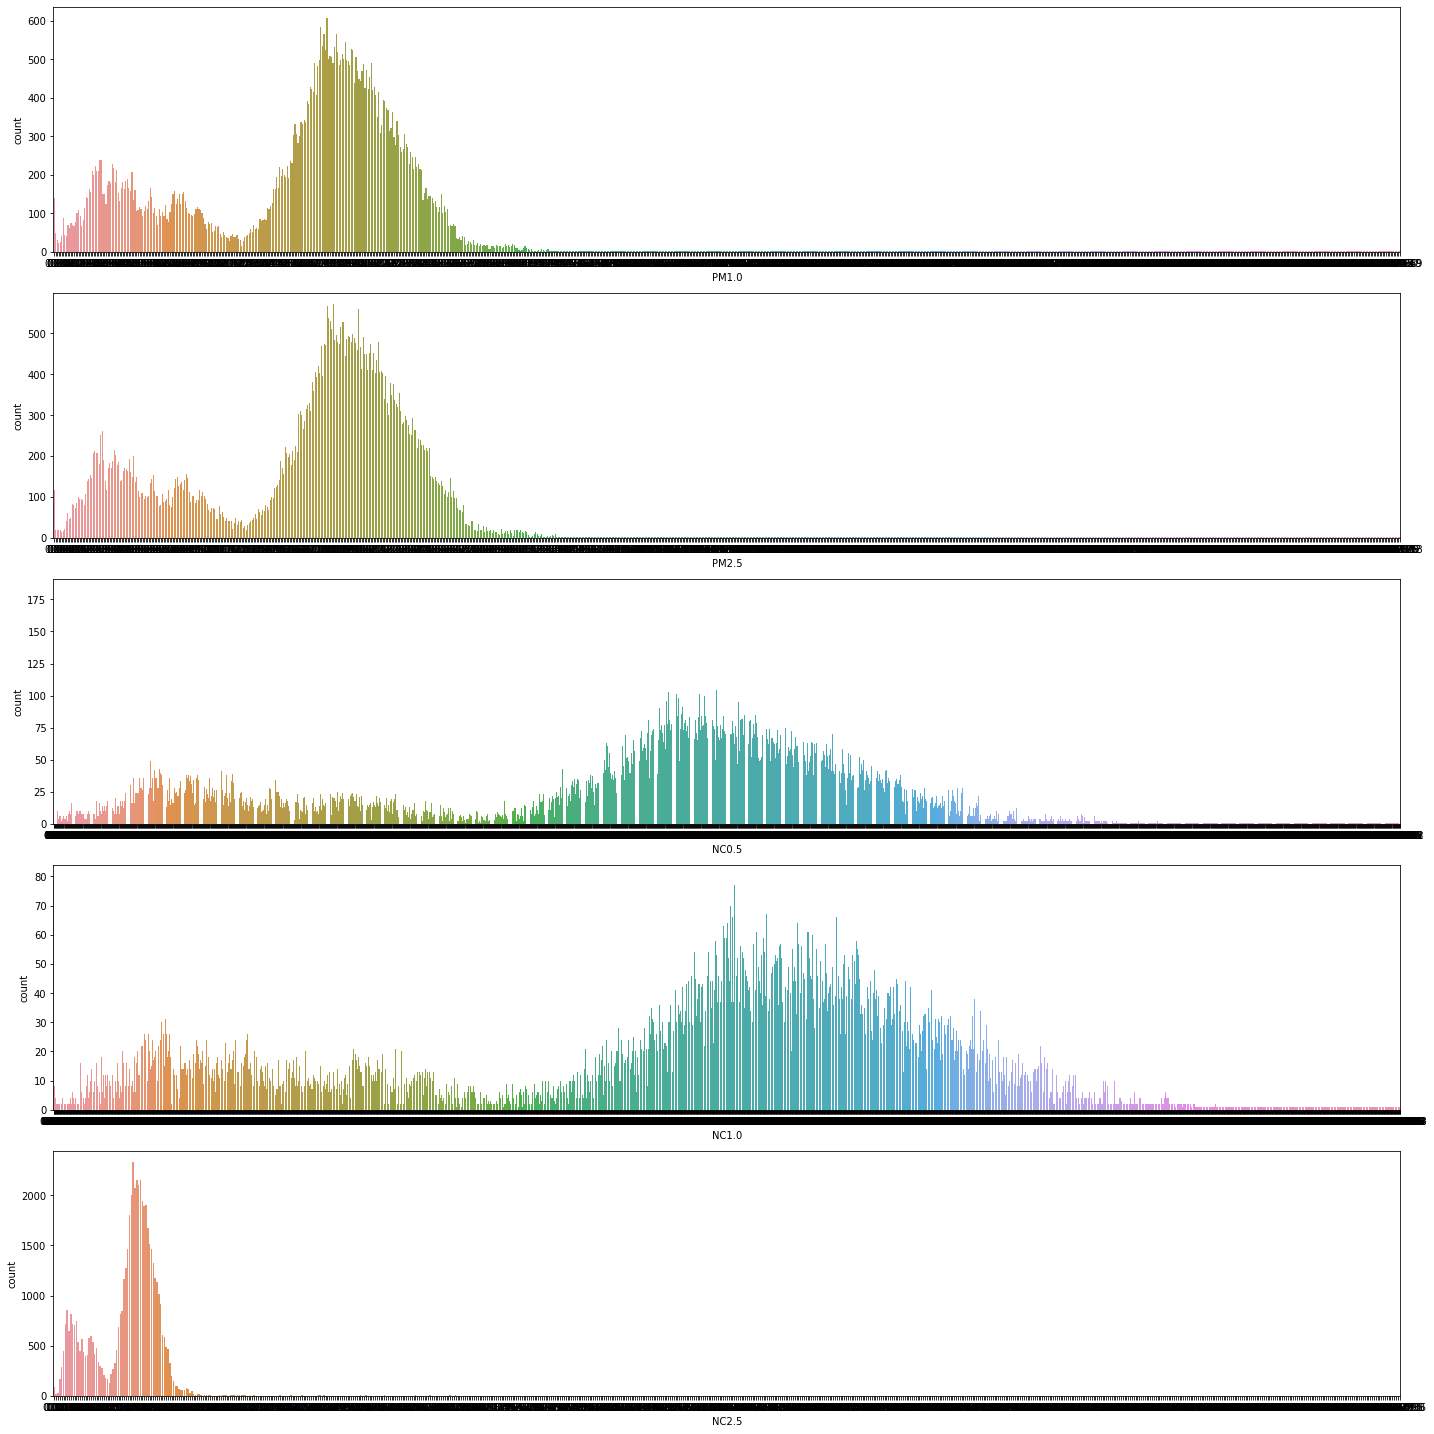

In [13]:
plt.figure(figsize=(20,20))

for index,column in enumerate(dfCategorical):
    plt.subplot(5,1,index+1)
    sns.countplot(data=dfCategorical,x=column)
    
plt.tight_layout(pad = 1.0)

In [14]:
df2 = dfNumeric.copy()
df2.drop(["PM1.0","PM2.5","NC0.5","NC1.0","NC2.5"],axis = 1,inplace=True)

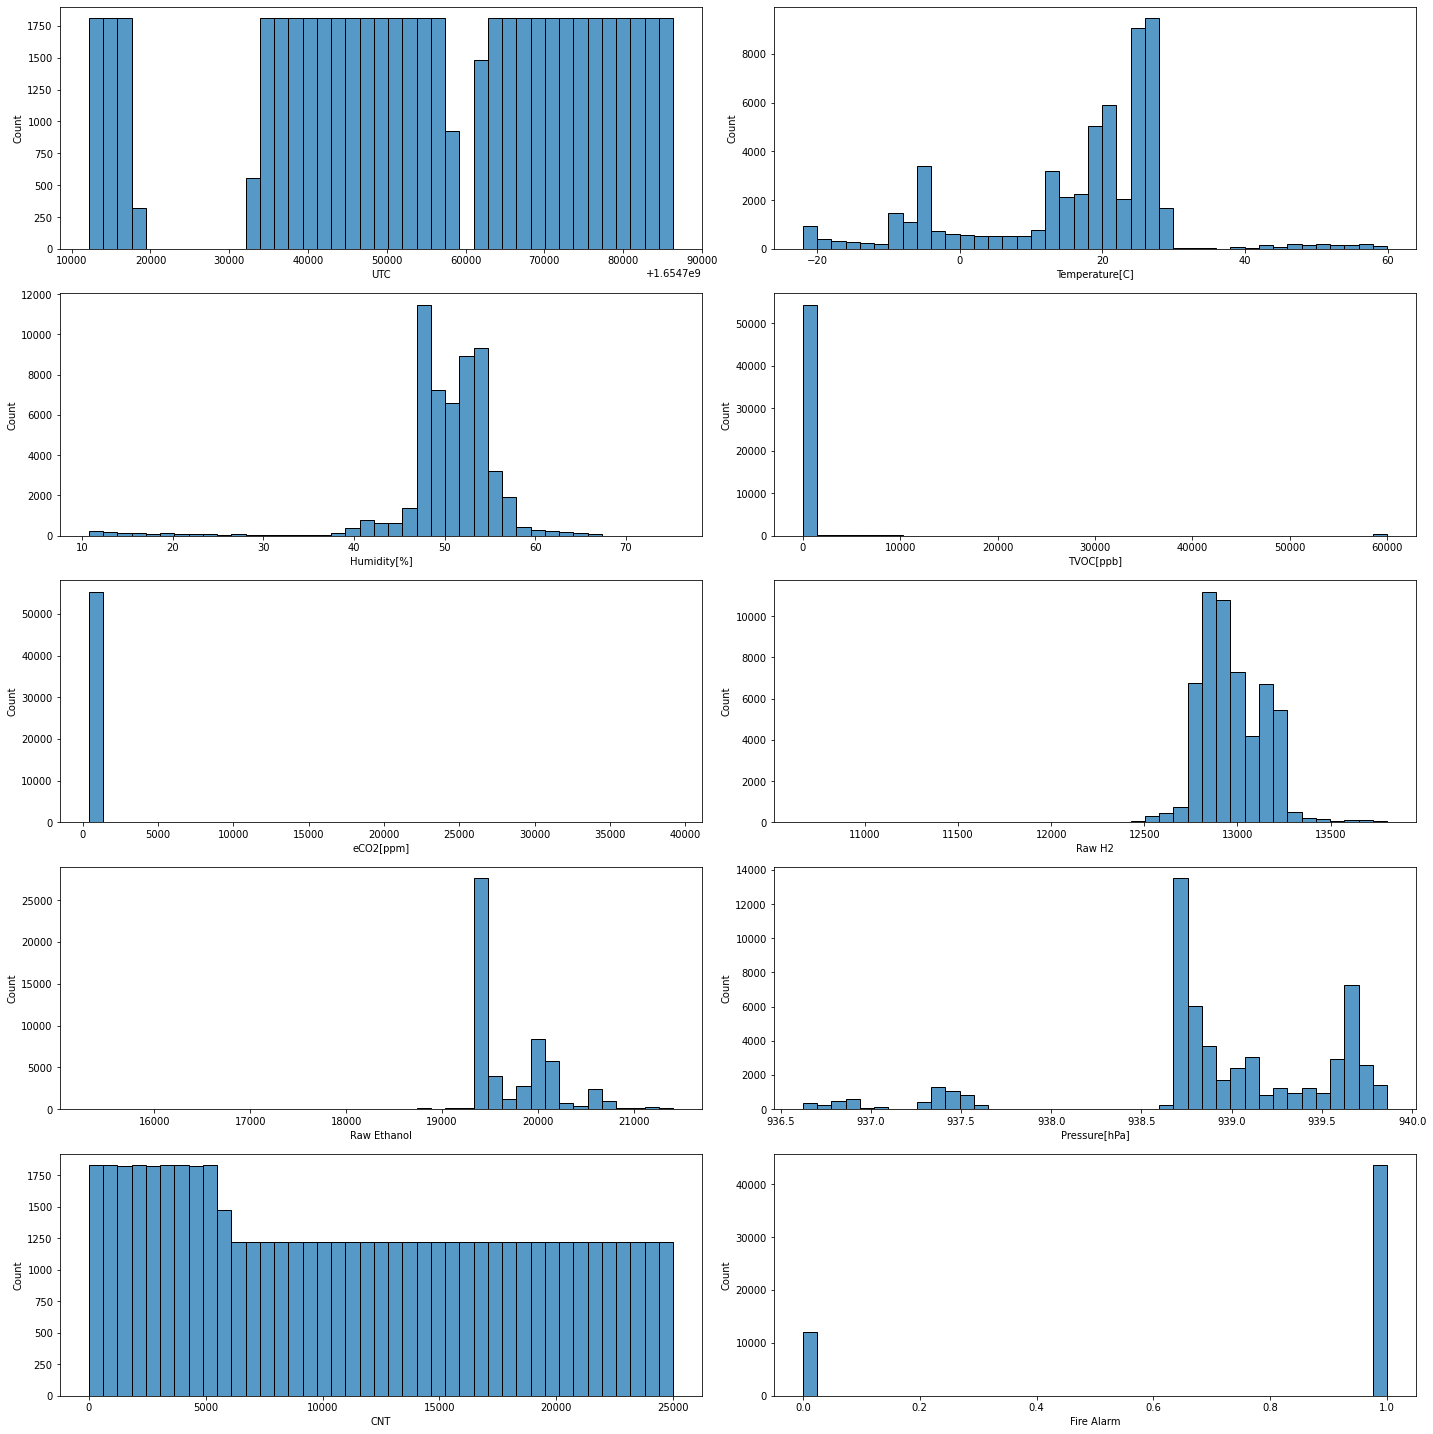

In [15]:
plt.figure(figsize=(20,20))

for index,column in enumerate(df2):
    plt.subplot(5,2,index+1)
    sns.histplot(data=dfNumeric,x=column,bins=41)
    
plt.tight_layout(pad = 1.0)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55732 entries, 0 to 56885
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             55732 non-null  int64  
 1   Temperature[C]  55732 non-null  float64
 2   Humidity[%]     55732 non-null  float64
 3   TVOC[ppb]       55732 non-null  int64  
 4   eCO2[ppm]       55732 non-null  int64  
 5   Raw H2          55732 non-null  int64  
 6   Raw Ethanol     55732 non-null  int64  
 7   Pressure[hPa]   55732 non-null  float64
 8   CNT             55732 non-null  int64  
 9   Fire Alarm      55732 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 6.7 MB


In [17]:
dfNumeric.drop(["eCO2[ppm]","TVOC[ppb]"],axis = 1,inplace=True)


In [18]:
df = dfNumeric.copy()

In [19]:
px.histogram(dfNumeric,x="CNT",color = "Fire Alarm",barmode="group",text_auto=".2f",template = "plotly_dark")

In [20]:
px.histogram(dfNumeric,x="CNT",color = "Fire Alarm",histnorm="percent",text_auto=".2f",template = "plotly_dark")

In [21]:
px.histogram(dfNumeric,x="UTC",color = "Fire Alarm",barmode="group",text_auto=".2f",template = "plotly_dark")

In [22]:
px.histogram(dfNumeric,x="UTC",color = "Fire Alarm",histnorm="percent",text_auto=".2f",template = "plotly_dark")

In [23]:
px.histogram(dfNumeric,x="Temperature[C]",color = "Fire Alarm",barmode="group",text_auto=".2f",template = "plotly_dark")

In [24]:
px.histogram(dfNumeric,x="Temperature[C]",color = "Fire Alarm",histnorm="percent",text_auto=".2f",template = "plotly_dark")

In [25]:
px.histogram(dfNumeric,x="Humidity[%]",color = "Fire Alarm",barmode="group",text_auto=".2f",template = "plotly_dark")

In [26]:
px.histogram(dfNumeric,x="Humidity[%]",color = "Fire Alarm",histnorm="percent",text_auto=".2f",template = "plotly_dark")

In [27]:
px.histogram(dfNumeric,x="Pressure[hPa]",color = "Fire Alarm",barmode="group",text_auto=".2f",template = "plotly_dark")

In [28]:
df2

UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654733331          20.000        57.36          0        400   12306   
1      1654733332          20.015        56.67          0        400   12345   
2      1654733333          20.029        55.96          0        400   12374   
3      1654733334          20.044        55.28          0        400   12390   
4      1654733335          20.059        54.69          0        400   12403   
...           ...             ...          ...        ...        ...     ...   
56881  1654717926          46.090        15.79        625        400   13723   
56882  1654717927          46.100        15.87        612        400   13731   
56883  1654717928          45.990        15.84        627        400   13725   
56884  1654717929          44.810        16.04        638        400   13712   
56885  1654717930          44.280        16.52        643        400   13696   

       Raw Ethanol  Pressure[hPa]   CNT  Fire Alarm  
0            18520        939.735     0           0  
1            18651        939.744     1           0  
2            18764        939.738     2           0  
3            18849        939.736     3           0  
4            18921        939.744     4           0  
...            ...            ...   ...         ...  
56881        20569        936.670  5739           0  
56882        20588        936.678  5740           0  
56883        20582        936.687  5741           0  
56884        20566        936.680  5742           0  
56885        20543        936.676  5743           0  

[55732 rows x 10 columns]

In [29]:
df

UTC  Temperature[C]  Humidity[%]  Raw H2  Raw Ethanol  \
0      1654733331          20.000        57.36   12306        18520   
1      1654733332          20.015        56.67   12345        18651   
2      1654733333          20.029        55.96   12374        18764   
3      1654733334          20.044        55.28   12390        18849   
4      1654733335          20.059        54.69   12403        18921   
...           ...             ...          ...     ...          ...   
56881  1654717926          46.090        15.79   13723        20569   
56882  1654717927          46.100        15.87   13731        20588   
56883  1654717928          45.990        15.84   13725        20582   
56884  1654717929          44.810        16.04   13712        20566   
56885  1654717930          44.280        16.52   13696        20543   

       Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5   CNT  Fire Alarm  
0            939.735   0.00   0.00   0.00  0.000  0.000     0           0  
1            939.744   0.00   0.00   0.00  0.000  0.000     1           0  
2            939.738   0.00   0.00   0.00  0.000  0.000     2           0  
3            939.736   0.00   0.00   0.00  0.000  0.000     3           0  
4            939.744   0.00   0.00   0.00  0.000  0.000     4           0  
...              ...    ...    ...    ...    ...    ...   ...         ...  
56881        936.670   0.63   0.65   4.32  0.673  0.015  5739           0  
56882        936.678   0.61   0.63   4.18  0.652  0.015  5740           0  
56883        936.687   0.57   0.60   3.95  0.617  0.014  5741           0  
56884        936.680   0.57   0.59   3.92  0.611  0.014  5742           0  
56885        936.676   0.57   0.59   3.90  0.607  0.014  5743           0  

[55732 rows x 13 columns]

In [30]:
df2.drop(["UTC","Temperature[C]","CNT"],axis = 1,inplace = True)


In [31]:
df["FireAlarm"] = df["Fire Alarm"]

In [32]:
df.drop("Fire Alarm",axis = 1,inplace = True)

In [33]:
temperature = df[["Temperature[C]","FireAlarm"]]
NoFireAlarm = temperature.query('FireAlarm == 0')
YesFireAlarm = temperature.query('FireAlarm == 1')


In [34]:
NoFireAlarm[NoFireAlarm["Temperature[C]"] < 20.000] = 0
NoFireAlarm[NoFireAlarm["Temperature[C]"] >= 20.000] = 1

In [35]:
YesFireAlarm[YesFireAlarm["Temperature[C]"] < 20.000] = 0
YesFireAlarm[YesFireAlarm["Temperature[C]"] >= 20.000] = 1

Text(0.5, 1.0, '          Fire Alarm on Degree (0:Cold Weather(Below 20C) 1:Hot Weather(Above 20C)')

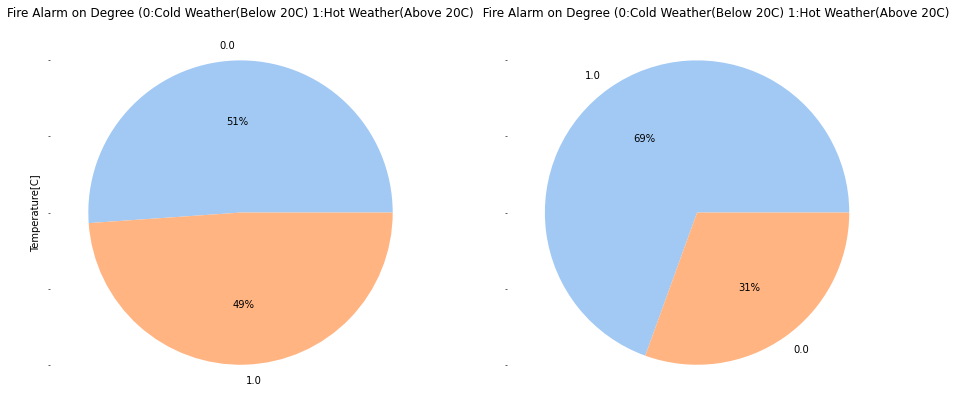

In [36]:
fig,axes = plt.subplots(1,2,figsize = (15,8),sharey=True)

YesFireAlarm["Temperature[C]"].value_counts().plot(ax = axes[0],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[0].set_title("Fire Alarm on Degree (0:Cold Weather(Below 20C) 1:Hot Weather(Above 20C)")

NoFireAlarm["Temperature[C]"].value_counts().plot(ax = axes[1],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[1].set_title("          Fire Alarm on Degree (0:Cold Weather(Below 20C) 1:Hot Weather(Above 20C)")


In [37]:
df["Humidity[%]"].median()

50.88

In [38]:
humidity = df[["Humidity[%]","FireAlarm"]]
NoFireAlarm = humidity.query('FireAlarm == 0')
YesFireAlarm = humidity.query('FireAlarm == 1')
NoFireAlarm[NoFireAlarm["Humidity[%]"] < 50.00] = 0
NoFireAlarm[NoFireAlarm["Humidity[%]"] >= 50.00] = 1
YesFireAlarm[YesFireAlarm["Humidity[%]"] < 50.00] = 0
YesFireAlarm[YesFireAlarm["Humidity[%]"] >= 50.00] = 1

Text(0.5, 1.0, 'Humidity on FireAlarm (0:Below 50 1:Above 50.01)')

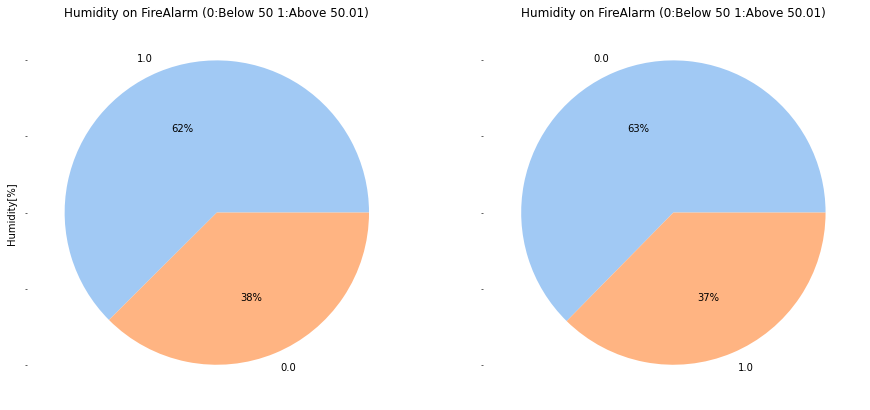

In [39]:
fig,axes = plt.subplots(1,2,figsize = (15,8),sharey=True)

YesFireAlarm["Humidity[%]"].value_counts().plot(ax = axes[0],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[0].set_title("Humidity on FireAlarm (0:Below 50 1:Above 50.01)")

NoFireAlarm["Humidity[%]"].value_counts().plot(ax = axes[1],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[1].set_title("Humidity on FireAlarm (0:Below 50 1:Above 50.01)")


In [40]:
df["Pressure[hPa]"].median()

938.897

In [41]:
pressure = df[["Pressure[hPa]","FireAlarm"]]
NoFireAlarm = pressure.query('FireAlarm == 0')
YesFireAlarm = pressure.query('FireAlarm == 1')
NoFireAlarm[NoFireAlarm["Pressure[hPa]"] < 938.816] = 0
NoFireAlarm[NoFireAlarm["Pressure[hPa]"] >= 938.816] = 1
YesFireAlarm[YesFireAlarm["Pressure[hPa]"] < 938.816] = 0
YesFireAlarm[YesFireAlarm["Pressure[hPa]"] >= 938.816] = 1

Text(0.5, 1.0, 'Pressure on FireAlarm (0:Below 938 1:Above 938)')

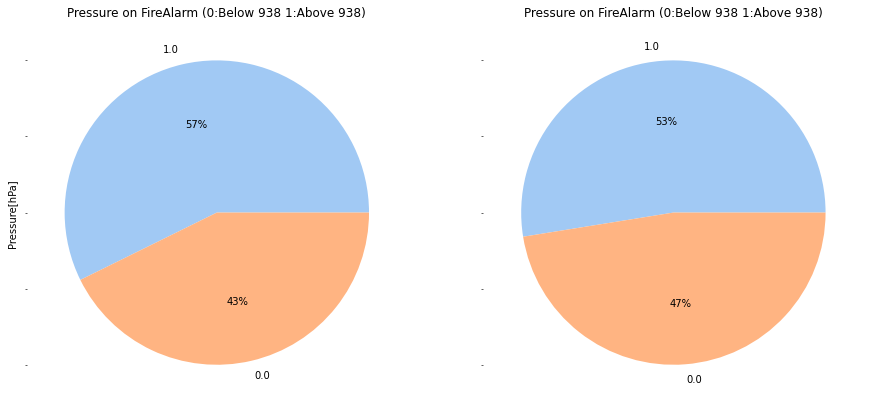

In [42]:
fig,axes = plt.subplots(1,2,figsize = (15,8),sharey=True)

YesFireAlarm["Pressure[hPa]"].value_counts().plot(ax = axes[0],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[0].set_title("Pressure on FireAlarm (0:Below 938 1:Above 938)")

NoFireAlarm["Pressure[hPa]"].value_counts().plot(ax = axes[1],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[1].set_title("Pressure on FireAlarm (0:Below 938 1:Above 938)")

<AxesSubplot:>

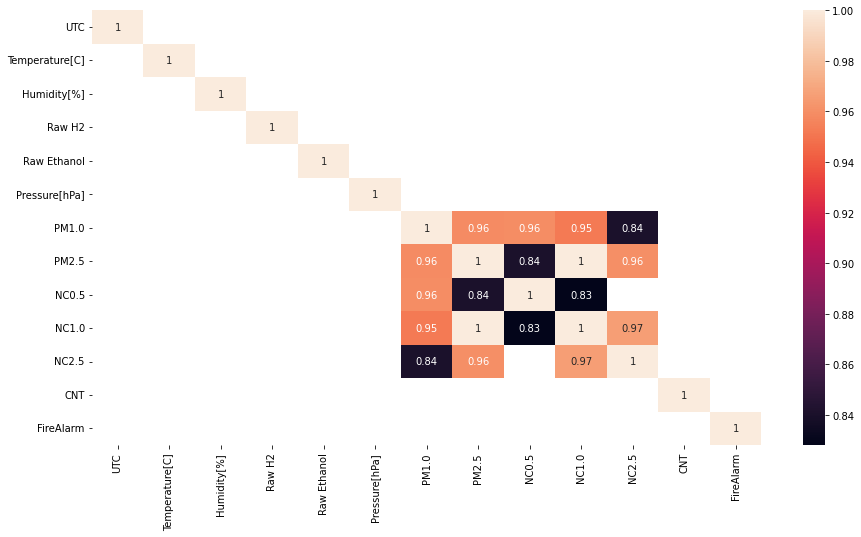

In [43]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,mask = corr < 0.7,annot = True)

In [44]:
df.drop(["PM2.5","NC0.5","NC1.0","NC2.5"],axis = 1,inplace=True)

<h1  style="text-align: center" class="list-group-item list-group-item-action active">5. Data Preprocessing</h1><a id = "5"></a>

In [15]:
scaler = MinMaxScaler()

In [18]:
import pandas as pd
data=pd.read_csv("E:/3.hocki1nam4\IoT\BTL_IOT\BE\data\smoke_detection_iot.csv")

In [21]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [28]:
X = data[["Temperature[C]", "Humidity[%]", "TVOC[ppb]", "eCO2[ppm]", "Raw Ethanol"]]
y = data["Fire Alarm"]

In [29]:
X = scaler.fit_transform(X)


In [30]:
X

array([[0.51269221, 0.72323922, 0.        , 0.        , 0.52568521],
       [0.51287527, 0.71253491, 0.        , 0.        , 0.54718529],
       [0.51304613, 0.70152032, 0.        , 0.        , 0.56573117],
       ...,
       [0.49886502, 0.07911883, 0.01045   , 0.        , 0.86410635],
       [0.5015011 , 0.08222153, 0.01063333, 0.        , 0.86148039],
       [0.50413717, 0.08966801, 0.01071667, 0.        , 0.85770556]])

<h1  style="text-align: center" class="list-group-item list-group-item-action active">6. Models</h1><a id = "6"></a>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [33]:
rd = RandomForestClassifier()
rd.fit(X_train,y_train)
y_pred = rd.predict(X_test)


In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9994784015663332

In [35]:
parameters = {
    "n_estimators" : [50,100,200,400],
    "criterion" : ["gini","entropy","log_loss"],
    "max_depth" : [1,5,10,None],
    "max_features" : ["sqrt","log2",None]
    
}

In [36]:
rsc = RandomizedSearchCV(estimator=RandomForestClassifier(),
                        param_distributions=parameters,
                         cv = 5,
                         n_iter = 10,
                         verbose=1,
                         scoring="roc_auc"
                        )

In [37]:
rsc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 5, 10, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [50, 100, 200, 400]},
                   scoring='roc_auc', verbose=1)

In [38]:
print("Best parameters : ",rsc.best_params_)
print("Best scor {:.2f} ".format(rsc.best_score_))

Best parameters :  {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'log_loss'}
Best scor 1.00 
